In [6]:
import numpy as np
import matplotlib.pyplot as plt
import math

Iteration    0: Cost 1.66e+03 
Iteration  100: Cost 6.95e+02 
Iteration  200: Cost 5.88e+02 
Iteration  300: Cost 5.26e+02 
Iteration  400: Cost 4.90e+02 
Iteration  500: Cost 4.69e+02 
Iteration  600: Cost 4.56e+02 
Iteration  700: Cost 4.49e+02 
Iteration  800: Cost 4.45e+02 
Iteration  900: Cost 4.42e+02 
W final: [18.69806954]

b final: -52.08341025448667


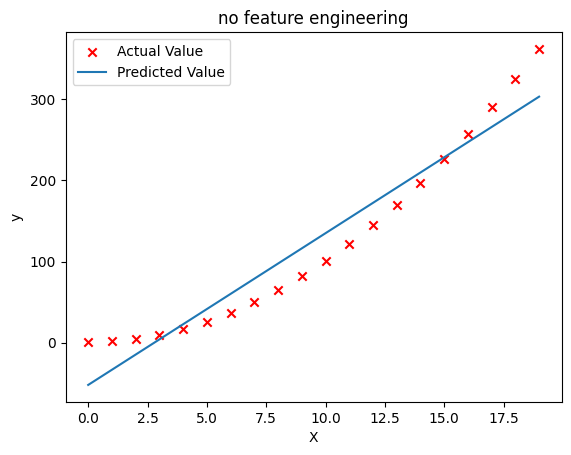

In [11]:
# Linear Regression Implementation :
# Compute Cost
def compute_cost(x, y, w, b):
    n = x.shape[0]
    predictions = x.dot(w) + b    # shape (n,)
    cost = np.sum((predictions - y) ** 2) / (2 * n)
    return cost


# Compute Gradient
def compute_gradient(x,y,w,b):
  n,m = x.shape
  dj_dw = np.zeros_like(w)
  dj_db = 0
  for i in range(n):
    diff = np.dot(w,x[i]) + b - y[i]
    for j in range(m):
      dj_dw[j] += diff*x[i,j]
    dj_db += diff
  dj_dw = dj_dw/n
  dj_db = dj_db/n
  return dj_dw, dj_db

# Gradient Descent
def run_gradient_descent(x,y,iterations,alpha):
  w = np.zeros_like(x[0], dtype=float)
  b = 0.0
  j_hist=[]
  for i in range(iterations):
    dj_dw, dj_db = compute_gradient(x,y,w,b)
    w-= alpha*dj_dw
    b-= alpha*dj_db
    if i<100000:
      j_hist.append(compute_cost(x,y,w,b))

    if i% math.ceil(iterations/10) == 0:
      print(f"Iteration {i:4}: Cost {j_hist[-1]:0.2e} ")
  return w,b



# Making Test values
x = np.arange(0,20,1)
y = 1 + x**2
X = x.reshape(-1,1)

# Testing
model_w, model_b = run_gradient_descent(X,y, iterations=1000, alpha=1e-2)
print(f"W final: {model_w}\n")
print(f"b final: {model_b}")

# Plotting on Graph
plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("no feature engineering")
plt.plot(x,X@model_w + model_b, label="Predicted Value");  plt.xlabel("X"); plt.ylabel("y"); plt.legend(); plt.show()

Iteration    0: Cost 7.33e+03 
Iteration 1000: Cost 2.25e-01 
Iteration 2000: Cost 2.23e-01 
Iteration 3000: Cost 2.21e-01 
Iteration 4000: Cost 2.19e-01 
Iteration 5000: Cost 2.17e-01 
Iteration 6000: Cost 2.15e-01 
Iteration 7000: Cost 2.13e-01 
Iteration 8000: Cost 2.11e-01 
Iteration 9000: Cost 2.09e-01 
W final: [1.00417494]

b final: 0.04896443659681638


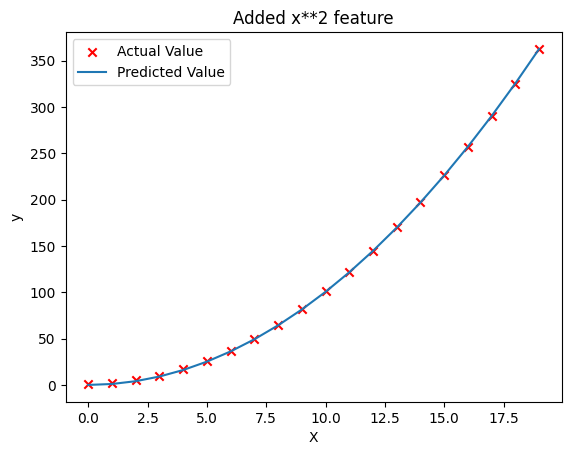

In [13]:
# target data
x = np.arange(0,20,1)
y = 1 + x**2

X = x**2
X = X.reshape(-1,1)
model_w, model_b = run_gradient_descent(X,y, iterations=10000, alpha=1e-5)
print(f"W final: {model_w}\n")
print(f"b final: {model_b}")
plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("Added x**2 feature")
plt.plot(x, np.dot(X,model_w)+model_b, label="Predicted Value");  plt.xlabel("X"); plt.ylabel("y"); plt.legend(); plt.show()


In [14]:
# Target data
x = np.arange(0,20,1)
y = x**2
X = np.c_[x, x**2, x**3]
X_feat = ['x','x^2','x^3']

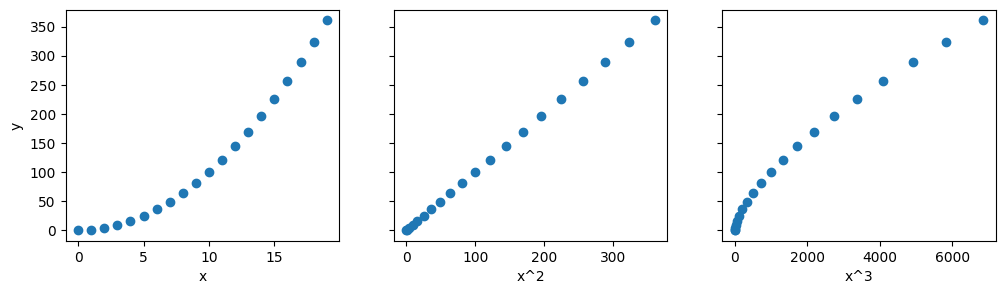

In [16]:
fig,ax=plt.subplots(1, 3, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X[:,i],y)
    ax[i].set_xlabel(X_feat[i])
ax[0].set_ylabel("y")
plt.show()